In [204]:
from datetime import datetime
from datetime import timedelta
import pandas as pd
import matplotlib
import numpy as np

In [2]:
#max_interval_time=timedelta(hours=3)
#min_interval_time=timedelta(seconds=0)
##Read origin data
df=pd.read_pickle('data/2to9data.pkl',)

In [3]:
#this is for filter the interval by eliminate the 14% longest watch interval which we consider as the outlier and don't belong to a session.
interval_threhold=0.14

In [4]:
df

,time,user,item
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4
4347643,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4
...,...,...,...
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4
7206340,2010-07-01 16:09:47,00101111100110100100010010101101,新三国(第94集).mp4
8302992,2010-07-02 19:22:52,00101111100110100100000001010101,世界杯100609热身赛西班牙6-0波兰.mp4


In [5]:
#df.loc[df['user']=='11011110110011000101100010000010']

In [6]:
#get the list of the User
userlist=df['user'].drop_duplicates()
userlist=userlist.iloc[::-1]
userlist

8302992    00101111100110100100000001010101
6940217    00101111100110100100010010101101
369144     00111010000100000000000100000010
4619059    00111010000100000000000100000110
4605577    00111010000100000000000100011100
                         ...               
8153339    11011110111110011000000000110100
128977     11011110111110011000001101100100
6972493    11011110111110011001000001110111
7140238    11011110111110011001100011000001
4347024    11011110111110011001100100010011
Name: user, Length: 1225506, dtype: object

In [7]:
#show single user data
#df.loc[df_short['user']==userlist.iloc[0]]

In [8]:
##transfer the 'time' data from str to datatime for subsequent processing
df['time']=pd.to_datetime(df['time'])
df['interval']=df['time'].shift(-1)-df['time']#to get the watch interval by subtracting from row to row
df_cut=df.drop(df.groupby(['user']).tail(1).index, axis=0)#throw the last record of each user as the interval is invalid
df_cut=df_cut.drop(df_cut[df_cut['item']==''].index)

In [9]:
df_cut

,time,user,item,interval
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13
4347643,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:00
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02
...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46


In [66]:
item_count=df_cut.groupby(['item'])[['interval']].count().rename(columns={'interval':'count'})
item_count=item_count.sort_values(by=['count'],ascending=False)
item_count.mean()

count    80.47304
dtype: float64

In [ ]:
#base on the parameter of interval_threhold to find the filter position to eliminate the outlier data
item_count['top_pos']=item_count['count']*interval_threhold

In [85]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(item_count.head(10000))

,count,top_pos
item,,
泡沫之夏(第05集).mp4,31299,4381.86
人兽杂交.mp4,28772,4028.08
功夫梦(抢先版).mp4,27404,3836.56
泡沫之夏(第04集).mp4,23209,3249.26
泡沫之夏(第01集).mp4,22190,3106.60
特工的特别任务.mp4,21198,2967.72
波斯王子：时之刃(清晰版).mp4,17516,2452.24
谈情说案(第24集).mp4,17398,2435.72
谈情说案(第01集).mp4,15087,2112.18


In [104]:
rank_df=df_cut.copy()
rank_df['seconds']=rank_df['interval'].dt.total_seconds()
rank_df

,time,user,item,interval,seconds
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,973.0
4347643,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:00,0.0
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22,22.0
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,2.0
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,2.0
...,...,...,...,...,...
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,3234.0
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52,3232.0
6959522,2010-07-01 12:57:36,00101111100110100100010010101101,新三国(第92集).mp4,0 days 01:31:25,5485.0
7188472,2010-07-01 14:29:01,00101111100110100100010010101101,新三国(第93集).mp4,0 days 01:40:46,6046.0


In [144]:
rank_df=rank_df.sort_values(['item','seconds'],ascending=[False,False])
rank_df

,time,user,item,interval,seconds
4250682,2010-06-29 10:57:55,11011100110001011100001000001011,龚如心遗产判华懋慈善基金获得.mp4,0 days 00:00:00,0.0
5720653,2010-06-30 16:06:15,00111010001000111000010010000010,龙鸣(第24集).mp4,1 days 08:06:42,115602.0
2143345,2010-06-27 12:33:18,01110010010110110011000110100011,龙鸣(第24集).mp4,0 days 09:01:26,32486.0
1356469,2010-06-26 19:48:51,11011010010011110111000100001100,龙鸣(第24集).mp4,0 days 02:09:14,7754.0
625052,2010-06-26 07:47:50,01110010010100001111001011111000,龙鸣(第24集).mp4,0 days 00:06:55,415.0
...,...,...,...,...,...
3143009,2010-06-28 13:22:04,01111011011110000100100101111010,00100512中道齐家三部曲之二家庭教育(1).mp4,0 days 00:29:12,1752.0
10035916,2010-07-03 18:42:09,01110101001011011011101101000000,00100512中道齐家三部曲之二家庭教育(1).mp4,0 days 00:09:11,551.0
5539523,2010-06-30 15:56:03,11010011100100001100011010010010,(23)寻找从容的李科-08年5月16日 成都凤凰山机场.mp4,0 days 00:00:23,23.0
3941404,2010-06-28 22:10:05,01110011100101100100010110001011,(21)寻找战士奶爸-08年5月16日 绵竹市汉旺金鱼嘴.mp4,0 days 00:16:26,986.0


In [178]:
#to get the continue watching data and save it in the list1 for saving running time
#adding time filter when connecting
len_list=[]
count=0
i=0
while(i<len(rank_df)):
    n=int(item_count.loc[rank_df.iloc[i]['item']]['top_pos'])+1
    if(i+n<len(rank_df) and rank_df.iloc[i+n]['item']==rank_df.iloc[i]['item']):
        len_list.append([rank_df.iloc[i+n]['item'],rank_df.iloc[i+n]['interval']])
    while(i+n<len(rank_df) and rank_df['item'].iloc[i+n]==rank_df['item'].iloc[i]):
        n+=1
    i=i+n
    count+=1
    if(count%10000==0):
        print(count,i)
print(count,i)

10000 700685
20000 1693527
30000 2431892
40000 3205316
50000 4206089
60000 5519248
70000 6366845
80000 7146844
90000 7954818
100000 8677439
110000 9128423


In [179]:
len_list
item_len=pd.DataFrame(len_list,columns=['item','est_length'])

[['龙鸣(第24集).mp4', Timedelta('0 days 02:09:14')],
 ['龙鸣(第23集).mp4', Timedelta('0 days 00:25:03')],
 ['龙鸣(第22集).mp4', Timedelta('0 days 00:23:56')],
 ['龙鸣(第21集).mp4', Timedelta('0 days 00:21:45')],
 ['龙鸣(第20集).mp4', Timedelta('0 days 00:22:29')],
 ['龙鸣(第19集).mp4', Timedelta('0 days 00:22:45')],
 ['龙鸣(第18集).mp4', Timedelta('0 days 00:14:41')],
 ['龙鸣(第17集).mp4', Timedelta('0 days 00:20:46')],
 ['龙鸣(第16集).mp4', Timedelta('0 days 00:22:07')],
 ['龙鸣(第15集).mp4', Timedelta('0 days 00:24:54')],
 ['龙鸣(第14集).mp4', Timedelta('0 days 00:19:56')],
 ['龙鸣(第13集).mp4', Timedelta('0 days 00:28:03')],
 ['龙鸣(第12集).mp4', Timedelta('0 days 00:23:23')],
 ['龙鸣(第11集).mp4', Timedelta('0 days 00:20:56')],
 ['龙鸣(第10集).mp4', Timedelta('0 days 00:26:19')],
 ['龙鸣(第09集).mp4', Timedelta('0 days 01:12:35')],
 ['龙鸣(第08集).mp4', Timedelta('0 days 00:22:59')],
 ['龙鸣(第07集).mp4', Timedelta('0 days 00:21:29')],
 ['龙鸣(第06集).mp4', Timedelta('0 days 00:24:20')],
 ['龙鸣(第05集).mp4', Timedelta('0 days 00:23:11')],
 ['龙鸣(第04集).mp4', Ti

In [194]:
#item_len.sort_values(['est_length'],ascending=False)

,item,est_length
3558,食尚玩家-100401-三代同堂游花莲.mp4,5 days 21:22:02
40982,派遣员的品格(第06集).mp4,5 days 20:43:42
56477,我心荡漾(第16集).mp4,5 days 09:22:19
48481,月亮河DVD.mp4,4 days 22:11:39
15148,诺贝尔赎金(高清).mp4,4 days 21:43:12
...,...,...
38946,温州女顾客连扇店员十余耳光视频曝光引发公愤-4月17日.mp4,0 days 00:00:00
97117,世界杯100531埃辛伤难愈告别世界杯.mp4,0 days 00:00:00
32772,王家岭最后被困工人遗体寻获 矿难事故正在调查-4月26日.mp4,0 days 00:00:00
57281,成家立业(第21集).mp4,0 days 00:00:00


In [203]:
#item_len.loc[item_len['est_length']==timedelta(days=0)]

,item,est_length
403,黑龙江七台河煤矿透水事故5名被困矿工生还-4月6日.mp4,0 days
976,黄鹤楼票价上涨60% 未经听证遭质疑-6月7日.mp4,0 days
1289,黄加李泡世界杯第四期.mp4,0 days
1291,黄加李泡世界杯第三期.mp4,0 days
1298,黄光裕今日受审 聘中国第一刑辩律师为己辩护-4月22日.mp4,0 days
...,...,...
108390,100120郭宝山妻子悲伤入院 病榻泣读丈夫最后短信.mp4,0 days
108393,100120秦黄岛海冰渐融 各港口电煤运输恢复正常.mp4,0 days
108398,100120手机短信发黄段子将废号.mp4,0 days
108486,091205-CH_vs.mp4,0 days


In [182]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(item_len.head(1000))

,item,est_length
0,龙鸣(第24集).mp4,0 days 02:09:14
1,龙鸣(第23集).mp4,0 days 00:25:03
2,龙鸣(第22集).mp4,0 days 00:23:56
3,龙鸣(第21集).mp4,0 days 00:21:45
4,龙鸣(第20集).mp4,0 days 00:22:29
5,龙鸣(第19集).mp4,0 days 00:22:45
6,龙鸣(第18集).mp4,0 days 00:14:41
7,龙鸣(第17集).mp4,0 days 00:20:46
8,龙鸣(第16集).mp4,0 days 00:22:07
9,龙鸣(第15集).mp4,0 days 00:24:54


In [183]:
#caculate the watch ratio 
summary=df_cut.join(item_len.set_index('item'), on='item')
summary['watch_ratio']=summary['interval']/summary['est_length']

In [190]:
#eliminate the outlier watch_ratio data such as watch_ratio<=0 and watch_ratio>=1
summary=summary.drop(summary[summary['watch_ratio']==0].index)
summary=summary.drop(summary[summary['watch_ratio']>=1].index)

In [191]:
summary

,time,user,item,interval,est_length,watch_ratio
4347024,2010-06-29 18:44:26,11011110111110011001100100010011,梁静茹豪华婚礼实录.mp4,0 days 00:16:13,0 days 15:59:26,0.016902
4347646,2010-06-29 19:00:39,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:00:22,0 days 00:29:41,0.012353
4347666,2010-06-29 19:01:01,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:07:01,0.004751
4347667,2010-06-29 19:01:03,11011110111110011001100100010011,传奇故事-100126-一场没有骗子的骗局.mp4,0 days 00:00:02,0 days 00:07:01,0.004751
4347670,2010-06-29 19:01:05,11011110111110011001100100010011,传奇故事-100125-女研究生自杀之谜.mp4,0 days 00:29:02,0 days 00:29:41,0.978102
...,...,...,...,...,...,...
9857193,2010-07-03 23:57:51,00111010000100000000000100000010,王牌大贱谍-091109-唱片界的数字密码大公开.mp4,0 days 00:00:47,0 days 00:17:41,0.044298
9648732,2010-07-03 23:58:38,00111010000100000000000100000010,新三国(第67集).mp4,0 days 00:00:55,0 days 01:11:35,0.012806
6940217,2010-07-01 11:09:50,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:54,0 days 01:04:13,0.839346
6948851,2010-07-01 12:03:44,00101111100110100100010010101101,新三国(第91集).mp4,0 days 00:53:52,0 days 01:04:13,0.838827


<AxesSubplot:ylabel='Frequency'>

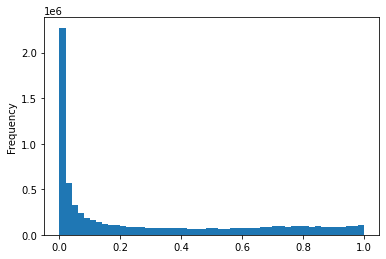

In [192]:
summary['watch_ratio'].plot.hist(bins=50)

In [205]:
len(summary)

7514610

In [206]:
summary.to_pickle('10M_watch_ratio_video_length_by_0.84.pkl')

In [207]:
summary['watch_ratio'].mean()

0.29202035819256367

In [208]:
summary['watch_ratio'].std()

0.32852198569312696

In [209]:
item_len['est_length'].mean()

Timedelta('0 days 00:51:27.456887104')

In [210]:
summary['interval'].mean()

Timedelta('0 days 00:16:47.030485281')